# Naive Bayes Classifier
Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

__Naive:__ It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other. <br>
__Bayes:__ It is called Bayes because it depends on the principle of Bayes' Theorem.

## Bayes' Theorem:
Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability. <br>
The formula for Bayes' theorem is given as:
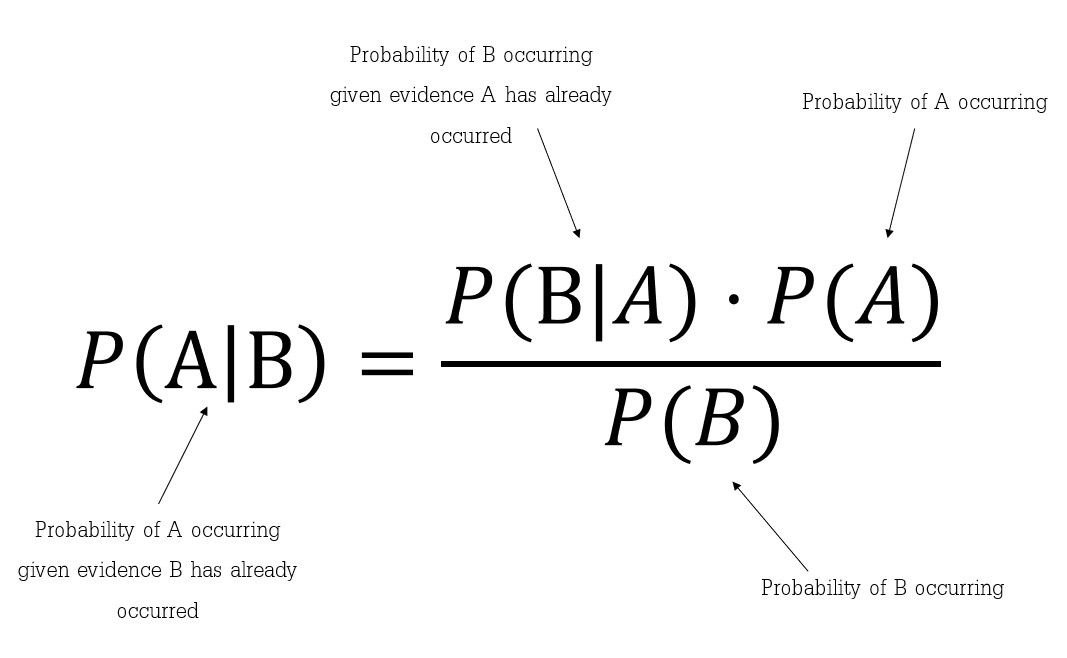

### in other words,
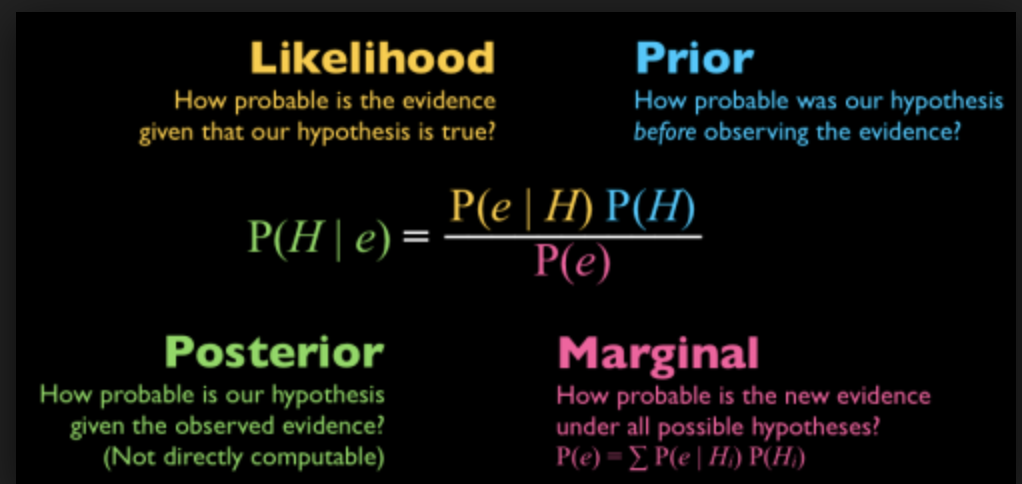

## Bayes Theorem Mathematical Proof:
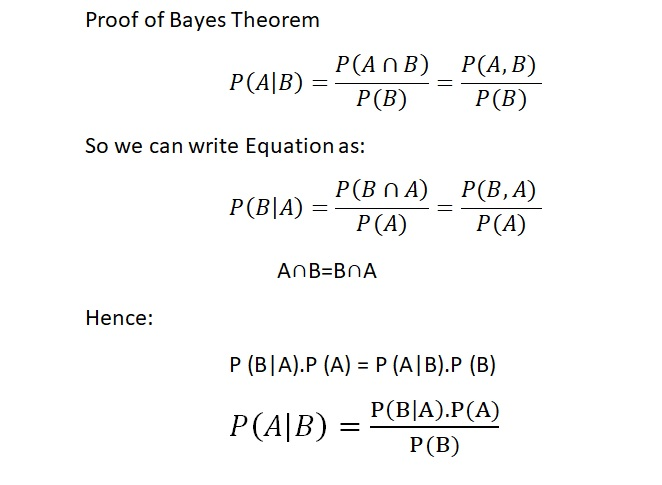

## Sample Problem: 
__In Exton School, 40% of the girls like music and 24% of the girls like dance.
Given that 30% of those that like music also like dance, what percent of those that like dance also like music?__  <br>

__Solution:__ <br>
Let A = Like music and B = Like dance

__First feature music, so assign A.__  <br>
P(A) = 40% = 0.4 <br>
__Second feature dance, assign B.__  
P(B) = 24% = 0.24 <br>
__A also B -> P(B|A)__  <br>
P(B|A) = 30% = 0.3 <br>
__Find: B also A -> P(A|B)__

Use Bayes' Theorem:
P(A|B) = P(B|A).P(A) / P(B)
       = 50%

## For more detailed Mathematical Explanation:
##### (1) Conditional Probability  : https://www.mathsisfun.com/data/probability-events-conditional.html
##### (2) Bayes Theorm             : https://www.mathsisfun.com/data/bayes-theorem.html 

# Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# PreProcess Data

In [3]:
# these features does not contribute anything in the prediction process

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [5]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [6]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [7]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head()
# dropping sex column as well male column because of dummy variable trap theory. 
# One column is enough to repressent male vs female

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [8]:
#to check for NaN values
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [9]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


# Classifier Model

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [13]:
model.fit(X_train,y_train)

GaussianNB()

In [14]:
model.score(X_test,y_test)

0.7761194029850746

## Note:
**The accuracy of model is low.**<br>
**Complex Hyperparameter Turning to improve the model accuracy will be performed in future projects.**

In [15]:
y_test[0:10]

784    0
756    0
413    0
21     1
615    1
749    0
493    0
564    0
164    0
753    0
Name: Survived, dtype: int64

In [16]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [17]:
model.predict_proba(X_test[:10])

array([[0.96340236, 0.03659764],
       [0.96484617, 0.03515383],
       [0.92312777, 0.07687223],
       [0.9298123 , 0.0701877 ],
       [0.10787551, 0.89212449],
       [0.96584979, 0.03415021],
       [0.53389583, 0.46610417],
       [0.47140389, 0.52859611],
       [0.913901  , 0.086099  ],
       [0.9624408 , 0.0375592 ]])

## Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(GaussianNB(),X_train, y_train, cv=5)
cv.mean()

0.763974193548387

### Note: 
**This notebook gives an gentle introduction to Naive Bayes Classifier with no HyperParameter Tuning.** <br>
**The various types of NaiveBayes such as Gaussian, Multinomial and Bernoulli will be discussed in detail later.**<br>